![nn](../Refrence_Images/Barkema_fig1.1.jpg)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import mpmath as mp

[Onsager's Exact solution](https://en.wikipedia.org/wiki/Square_lattice_Ising_model)

#### The critical temperature $T_c$ is given by
$$\sinh \frac{2J}{kT_c} = 1$$
or
$$\frac{kT_c}{J} = \frac{2}{\ln\left(1+\sqrt{2}\right)} \approx 2.269$$


#### Magnetization
The spontaneous magnetization is, for $T < T_c(\approx 2.27)$
$$M = \left[1-\sinh^{-4} (2\beta J)\right]^{1/8}$$



In [30]:
from time import perf_counter
from numba import jit

In [33]:
def pure_loop(m,T):
    for i in range(len(m)):
        T[i] = 2.26/bin*(i+1)
        m[i] = (1-np.sinh(2*(1/T[i]))**-4)**(1/8)
    return m,T

@jit(nopython=True)
def numba_loop(m,T):
    for i in range(len(m)):
        T[i] = 2.26/bin*(i+1)
        m[i] = (1-np.sinh(2*(1/T[i]))**-4)**(1/8)
    return m,T

In [136]:
bin = 100
T = np.zeros(bin)
m = np.zeros_like(T)

for i in range(len(m)):
    T[i] = 2.26/bin*(i+1)
    m[i] = (1-np.sinh(2*(1/T[i]))**-4)**(1/8) 

T = np.append(T,2/np.log(1+np.sqrt(2)))
m = np.append(m,0)
    

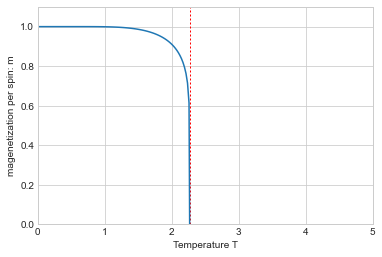

In [137]:
plt.cla()

plt.style.use('seaborn-whitegrid')
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.axvline(x=2/np.log(1+np.sqrt(2)),c='r',lw=1,dashes=[2,2])
plt.plot(T,m)

plt.ylabel('magenetization per spin: m')
plt.xlabel('Temperature T')
plt.show()

In [100]:
def C(T,J=1):
    b = 1/T #beta
    k = 2*np.sinh(2*b*J)/(np.cosh(2*b*J)**2)   #kappa
    K1, _ = integrate.quad(lambda x: 1/np.sqrt(1-k**2*np.sin(x)**2),0,np.pi/2)
    E1, _ = integrate.quad(lambda x: np.sqrt(1-k**2*np.sin(x)**2),0,np.pi/2)
    tanh = np.tanh(2*b*J)
    return 4/np.pi*((b*J/tanh)**2)*(K1-E1-(1-tanh**2)*(np.pi/2+(2*tanh**2-1)*K1)) # boltzman k = 1

def C2(T,J=1):
    b = 1/T
    Tc = 2/np.log(1+np.sqrt(2))
    return -2/np.pi*(2*J*b)**2*np.log(np.abs(1-T/Tc))

def C3(T,J=1):
    b = 1/T #beta
    k = 2*np.sinh(2*b*J)/(np.cosh(2*b*J)**2)   #kappa
    mp.mp.dps = 50
    K1 = mp.quad(lambda x: 1/mp.sqrt(1-k**2*mp.sin(x)**2),[0,mp.pi/2])
    E1 = mp.quad(lambda x: mp.sqrt(1-k**2*mp.sin(x)**2),[0,mp.pi/2])
    tanh = np.tanh(2*b*J)
    return 4/np.pi*((b*J/tanh)**2)*(K1-E1-(1-tanh**2)*(np.pi/2+(2*tanh**2-1)*K1)) # boltzman k = 1


In [93]:
print(2/np.log(1+np.sqrt(2)))

2.269185314213022


In [109]:
TT = 2.26918
print(C(TT),C2(TT),C3(TT))

6.105144717475782 6.411498569803975 6.1051444513979223323497628796687447593215158923758


In [133]:
bin = 200
T2 = np.zeros(bin)
c = np.zeros_like(T)

for i in range(len(c)):
    T2[i] = 5/bin*(i+1)
    c[i] = C(T[i])    

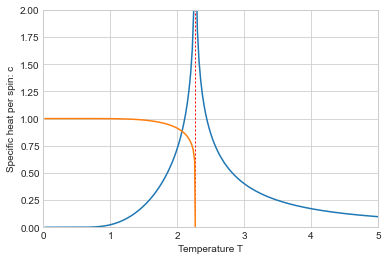

In [139]:
plt.cla()

plt.style.use('seaborn-whitegrid')
plt.ylim(0,2)
plt.xlim(0,5)
plt.axvline(x=2/np.log(1+np.sqrt(2)),c='r',lw=1,dashes=[2,2])
plt.plot(T2,c)
plt.plot(T,m)


plt.ylabel('Specific heat per spin: c')
plt.xlabel('Temperature T')
plt.show()